In [ ]:
 from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/orkg

/content/drive/My Drive/orkg


In [ ]:
#import librairies
import os, sys, json, glob
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import csv
import numpy as np
import seaborn as sns

%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

%matplotlib inline

TensorFlow 1.x selected.
1.15.2


In [ ]:
!pip install ampligraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 168 kB 4.6 MB/s 
     |████████████████████████████████| 2.7 MB 26.2 MB/s 
     |████████████████████████████████| 6.4 MB 8.2 MB/s 
     |████████████████████████████████| 64 kB 2.1 MB/s 
     |████████████████████████████████| 482 kB 33.5 MB/s 
     |████████████████████████████████| 120 kB 4.9 MB/s 
     |████████████████████████████████| 561 kB 31.3 MB/s 
     |████████████████████████████████| 69 kB 5.5 MB/s 
     |████████████████████████████████| 42 kB 713 kB/s 
     |████████████████████████████████| 41 kB 420 kB/s 
     |████████████████████████████████| 100 kB 9.0 MB/s 
     |████████████████████████████████| 121 kB 35.8 MB/s 
     |████████████████████████████████| 90 kB 8.6 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
  Created wheel for commonmark: filename=CommonMark-0.5.4-py3-none-any.whl size=30768 sha256=d5ebaba6128b

In [ ]:
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  283 non-null    int64 
 1   subject     283 non-null    object
 2   predicate   283 non-null    object
 3   object      283 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.0+ KB


In [ ]:
train_data.isnull().sum()

Unnamed: 0    0
subject       0
predicate     0
object        0
dtype: int64

In [ ]:
unique = train_data['object'].unique()

In [ ]:
len(unique)

202

In [ ]:
#train_data = train_data.iloc[: , 1:]
train_data_new = train_data.rename(columns={'Unnamed: 0': 'id'})
train_data_new

,id,subject,predicate,object
0,0,contribution,SCIBERT : A Pretrained Language Model for Scie...,Pretrained Language Model
1,1,contribution,Joint Extraction of Entities and Relations Bas...,Joint Extraction of Entities and Relations
2,2,contribution,Joint entity recognition and relation extracti...,Joint entity recognition and relation extraction
3,3,contribution,Data and text mining BioBERT : a pre-trained b...,pre-trained biomedical language representation
4,4,contribution,Semantic Relation Classification via Bidirecti...,Semantic Relation Classification
...,...,...,...,...
278,278,contribution,Going out on a limb : Joint Extraction of Enti...,e
279,279,contribution,Distant Supervision for Relation Extraction vi...,a
280,280,contribution,Hierarchical Neural Networks for Sequential Se...,r
281,281,contribution,Translations as Additional Contexts for Senten...,n


In [ ]:
train_data_new = test_data.rename(columns={'Unnamed: 0': 'id'})
test_data_new

,id,subject,predicate,object
0,0,contribution,One Single Deep Bidirectional LSTM Network for...,Word Sense Disambiguation
1,1,contribution,Joint Learning of the Embedding of Words and E...,Named Entity Disambiguation
2,2,contribution,Pre-training of Deep Contextualized Embeddings...,Named Entity Disambiguation
3,3,contribution,Neural Sequence Learning Models for Word Sense...,Word Sense Disambiguation
4,4,contribution,Semi-supervised Word Sense Disambiguation with...,Semi-supervised Word Sense Disambiguation
...,...,...,...,...
107,107,contribution,ADAPT at SemEval- 2018 Task 9 : Skip - Gram Wo...,t
108,108,contribution,"This form of training , which accounts for mod...",i
109,109,contribution,Structured Training for Neural Network Transit...,o
110,110,contribution,An improved neural network model for joint POS...,n


In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(train_data, "predicate", "object", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

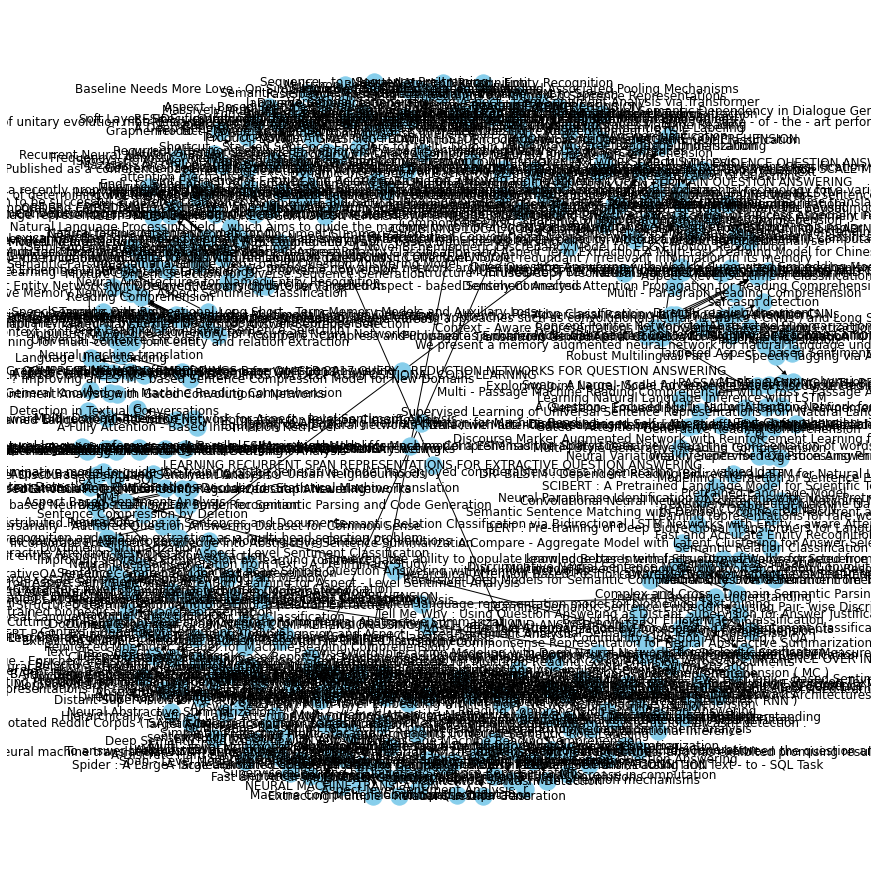

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    112 non-null    object
 1   predicate  112 non-null    object
 2   object     112 non-null    object
dtypes: object(3)
memory usage: 2.8+ KB


In [ ]:
test_data.shape
#train_data.shape

(112, 3)

In [ ]:
import ampligraph
from ampligraph.latent_features import ComplEx, TransE, DistMult, HolE


def complex():
  model = ComplEx(k=150,                                                             # embedding size
                epochs=300,                                                        # Num of epochs
                batches_count= 10,                                                 # Number of batches 
                eta=10,                                                             # number of corruptions to generate during training
                loss='pairwise', loss_params={'margin': 1},                        # loss type and it's hyperparameters         
                initializer='xavier', initializer_params={'uniform': False},       # initializer type and it's hyperparameters
                regularizer='LP', regularizer_params= {'lambda': 0.001, 'p': 3},   # regularizer along with its hyperparameters
                optimizer= 'adam', optimizer_params= {'lr': 0.0001},                # optimizer to use along with its hyperparameters
                seed= 0, verbose=True)
  return model


def transe():
  model = TransE(k=150,                                                             # embedding size
                epochs=300,                                                        # Num of epochs
                batches_count= 10,                                                 # Number of batches 
                eta=10,                                                             # number of corruptions to generate during training
                loss='pairwise', loss_params={'margin': 1},                        # loss type and it's hyperparameters         
                initializer='xavier', initializer_params={'uniform': False},       # initializer type and it's hyperparameters
                regularizer='LP', regularizer_params= {'lambda': 0.001, 'p': 3},   # regularizer along with its hyperparameters
                optimizer= 'adam', optimizer_params= {'lr': 0.0001},                # optimizer to use along with its hyperparameters
                seed= 0, verbose=True)
  return model

def distmult():
  model = DistMult(k=150,                                                             # embedding size
                epochs=300,                                                        # Num of epochs
                batches_count= 10,                                                 # Number of batches 
                eta=10,                                                             # number of corruptions to generate during training
                loss='pairwise', loss_params={'margin': 1},                        # loss type and it's hyperparameters         
                initializer='xavier', initializer_params={'uniform': False},       # initializer type and it's hyperparameters
                regularizer='LP', regularizer_params= {'lambda': 0.001, 'p': 3},   # regularizer along with its hyperparameters
                optimizer= 'adam', optimizer_params= {'lr': 0.0001},                # optimizer to use along with its hyperparameters
                seed= 0, verbose=True)
  return model


def hole():
  model = HolE(k=150,                                                             # embedding size
                epochs=300,                                                        # Num of epochs
                batches_count= 10,                                                 # Number of batches 
                eta=10,                                                             # number of corruptions to generate during training
                loss='pairwise', loss_params={'margin': 1},                        # loss type and it's hyperparameters         
                initializer='xavier', initializer_params={'uniform': False},       # initializer type and it's hyperparameters
                regularizer='LP', regularizer_params= {'lambda': 0.001, 'p': 3},   # regularizer along with its hyperparameters
                optimizer= 'adam', optimizer_params= {'lr': 0.0001},                # optimizer to use along with its hyperparameters
                seed= 0, verbose=True)
  return model

In [ ]:
train_data = train_data.iloc[: , 1:]
test_data = test_data.iloc[: , 1:]
X_train = train_data.to_numpy()
X_test = test_data.to_numpy()

In [ ]:
X_test.shape

(112, 3)

In [ ]:
tf.logging.set_verbosity(tf.logging.ERROR)
model =complex()
model.fit(np.concatenate((X_train, X_test)))

from ampligraph.utils import save_model, restore_model
save_model(model, 'ComplEx.pkl')

Average ComplEx Loss:   0.006236: 100%|██████████| 300/300 [00:38<00:00,  7.75epoch/s]


In [ ]:
tf.logging.set_verbosity(tf.logging.ERROR)

model2.fit(np.concatenate((X_train, X_test)))

from ampligraph.utils import save_model, restore_model
save_model(model2, 'DistMult.pkl')

Average DistMult Loss:   0.010282: 100%|██████████| 300/300 [00:12<00:00, 24.89epoch/s]


In [ ]:
tf.logging.set_verbosity(tf.logging.ERROR)

model3.fit(np.concatenate((X_train, X_test)))

from ampligraph.utils import save_model, restore_model
save_model(model3, 'HoIE.pkl')

Average HolE Loss:   0.923771: 100%|██████████| 300/300 [00:35<00:00,  8.37epoch/s]


In [ ]:
tf.logging.set_verbosity(tf.logging.ERROR)
model = transe()
model.fit(np.concatenate((X_train, X_test)))

from ampligraph.utils import save_model, restore_model
save_model(model, 'TransE.pkl')

Average TransE Loss:   0.029648: 100%|██████████| 300/300 [00:11<00:00, 26.51epoch/s]


## Evaluation

In [ ]:
filter_triples = np.concatenate((X_train, X_test))

In [ ]:
from ampligraph.evaluation import evaluate_performance

ranks = evaluate_performance(X_test,
                             model=model, 
                             filter_triples=filter_triples,
                             corrupt_side='s+o',
                             verbose =True )

100%|██████████| 112/112 [00:00<00:00, 521.25it/s]


In [ ]:
ranks1 = evaluate_performance(X_test,
                             model=model1, 
                             filter_triples=filter_triples,
                             corrupt_side='s+o',
                             verbose =True )

100%|██████████| 112/112 [00:00<00:00, 233.90it/s]


In [ ]:
ranks2 = evaluate_performance(X_test,
                             model=model2, 
                             filter_triples=filter_triples,
                             corrupt_side='s+o',
                             verbose =True )

100%|██████████| 112/112 [00:00<00:00, 227.60it/s]


In [ ]:
ranks3 = evaluate_performance(X_test,
                             model=model3, 
                             filter_triples=filter_triples,
                             corrupt_side='s+o',
                             verbose =True )

100%|██████████| 112/112 [00:00<00:00, 174.23it/s]


In [ ]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

mr = mr_score(ranks)
mrr = mrr_score(ranks)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 1.00
MR: 1.00
Hits@10: 1.00
Hits@3: 1.00
Hits@1: 1.00


In [ ]:
mr = mr_score(ranks1)
mrr = mrr_score(ranks1)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks1, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks1, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks1, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 0.33
MR: 3.00
Hits@10: 1.00
Hits@3: 1.00
Hits@1: 0.00


In [ ]:
mr = mr_score(ranks2)
mrr = mrr_score(ranks2)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks2, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks2, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks2, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 1.00
MR: 1.00
Hits@10: 1.00
Hits@3: 1.00
Hits@1: 1.00


In [ ]:
mr = mr_score(ranks3)
mrr = mrr_score(ranks3)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks3, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks3, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks3, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 1.00
MR: 1.00
Hits@10: 1.00
Hits@3: 1.00
Hits@1: 1.00


In [ ]:
from ampligraph.utils import save_model, restore_model

restore_model = restore_model('TransE.pkl')

In [ ]:
y_pred = restore_model.predict(X_test)
print(y_pred)

[-10.383963  -10.067469  -10.753993   -9.633822  -10.22826   -10.157724
  -9.724415   -9.968838  -10.097781  -10.111284   -9.705718   -9.724415
  -9.507217  -10.103401  -10.217807  -10.518798   -9.928339   -9.34242
  -9.950073   -9.884882   -9.794487   -9.7902155  -9.580102   -9.896678
 -10.7117195  -9.868432  -10.264186   -9.900997   -9.463693  -10.048546
  -9.855049   -9.613684   -9.685063  -10.242779   -9.55906    -9.436616
 -10.470008  -10.317029  -10.328383  -10.010741  -10.086872  -10.343755
 -10.131623  -10.099821   -9.314123   -9.907383  -10.122592  -10.363061
  -9.783435   -9.791178  -10.044308  -10.073397   -8.997629   -9.87732
 -10.428611  -10.154699  -10.155529   -9.959587  -10.375938   -9.966613
  -9.990753   -9.69708    -9.678469   -9.5817     -9.461331   -9.370602
  -9.991355   -9.835505  -10.452961   -9.506996   -9.885829  -10.566952
  -9.487121   -9.0880375  -9.685576   -9.916423   -9.816807  -10.007621
  -9.33197    -9.903918  -10.389097  -10.409852   -9.574983   -9.5

In [ ]:
from scipy.special import expit
probs = expit(y_pred)

In [ ]:
pd.DataFrame(list(zip([' '.join(x) for x in X_test], 
                      ranks, 
                      np.squeeze(y_pred),
                      np.squeeze(probs))), 
             columns=['statement', 'rank', 'score', 'prob']).sort_values("score")

,statement,rank,score,prob
2,contribution Pre-training of Deep Contextualiz...,3,-10.753993,0.000021
24,contribution Supervised and Semi- Supervised T...,3,-10.711720,0.000022
105,contribution Supervised Distributional Hyperny...,3,-10.619575,0.000024
101,contribution Recent work has proposed several ...,3,-10.594134,0.000025
71,contribution GLUE : A MULTI - TASK BENCHMARK A...,3,-10.566952,0.000026
...,...,...,...,...
78,contribution Natural Language Comprehension wi...,3,-9.331970,0.000089
44,contribution Look at Boundary : A Boundary - A...,3,-9.314123,0.000090
73,contribution A Deep Cascade Model for Multi - ...,3,-9.088037,0.000113
52,contribution Recurrent Scale Approximation for...,3,-8.997629,0.000124


In [ ]:
from ampligraph.utils import create_tensorboar

ImportError: ignored

## Machine Learning algorithm

In this part, we will learn how to extract a research problem domain given a sentence

### POS

In [ ]:
text_emb = dict(zip(train_data_new['id'], model.get_embeddings(train_data_new['id'])))

IndexError: ignored

In [ ]:
def get_features_target(mask):
    
    def get_embeddings(team):
        return team_embeddings.get(team, np.full(200, np.nan))
    
    X = np.hstack((np.vstack(df[mask].home_team_id.apply(get_embeddings).values),
                   np.vstack(df[mask].away_team_id.apply(get_embeddings).values)))
    y = df[mask].results.values
    return X, y